<a href="https://colab.research.google.com/github/Monishalakshmipathy/VISUAL_RECOMMENDER_VIDEOS/blob/main/VISUAL_RECOMMENDER_VIDEOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv("movies_metadata[1].csv")

<ipython-input-9-29902ba09b5b>:1: DtypeWarning: Columns (0,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("movies_metadata[1].csv")


In [ ]:
dataset.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
dataset.isna().sum()

adult                        0
belongs_to_collection    31530
budget                       0
genres                       0
homepage                 29488
id                           0
imdb_id                     13
original_language            4
original_title               0
overview                   539
popularity                   4
poster_path                224
production_companies         3
production_countries         3
release_date                44
revenue                      5
runtime                    124
spoken_languages             5
status                      59
tagline                  17708
title                        5
video                        5
vote_average                 5
vote_count                   5
dtype: int64

In [ ]:
df = dataset.dropna(axis=1)
df.sample(10)

,adult,budget,genres,id,original_title
18755,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",229670,Män kan inte våldtas
25442,False,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",121620,The Touch of Her Flesh
25007,False,20000000,"[{'id': 53, 'name': 'Thriller'}]",201759,La Marque des anges - Miserere
25767,False,0,"[{'id': 35, 'name': 'Comedy'}]",75298,Fontan
20523,False,0,"[{'id': 99, 'name': 'Documentary'}]",203329,ARAL. Fishing in an Invisible Sea
7526,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",29454,Ansikte mot Ansikte
14924,False,7000000,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",15846,The Burrowers
19342,False,5000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",71668,Piranha 3DD
17399,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",1482,Laws of Gravity
5208,False,2278264,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",26725,Nomads


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
vector = tf.fit_transform(df['original_title'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

title = "The Last Exorcism Part II"
query_vec = tf.transform([title])
similarity = cosine_similarity(query_vec,vector).flatten()
indices = np.argpartition(similarity,-10)[-10:]
results = df.iloc[indices][::-1]
results

,adult,budget,genres,id,original_title
15696,False,1800000,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",38358,The Last Exorcism
1178,False,13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",240,The Godfather: Part II
17136,False,80000000,"[{'id': 35, 'name': 'Comedy'}]",45243,The Hangover Part II
2924,False,0,"[{'id': 35, 'name': 'Comedy'}]",40771,Meatballs Part II
34094,False,0,"[{'id': 27, 'name': 'Horror'}]",262871,The House of Exorcism
20529,False,5000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",146203,The Last Exorcism Part II
11858,False,10200000,"[{'id': 27, 'name': 'Horror'}]",1691,Hostel: Part II
5756,False,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 10749,...",125337,The Last Seduction II
21291,False,0,"[{'id': 99, 'name': 'Documentary'}]",174322,Gasland Part II
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,Father of the Bride Part II


In [ ]:
#cnn
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
width = 100
height = 100
channels = 3
num_classes = 10

In [ ]:
train_data = np.random.randn(1000, width, height, channels)
train_labels = np.random.randint(num_classes, size=1000)
val_data = np.random.randn(200, width, height, channels)
val_labels = np.random.randint(num_classes, size=200)
test_data = np.random.randn(200, width, height, channels)
test_labels = np.random.randint(num_classes, size=200)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(width, height, channels)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_history = model.fit(train_data, train_labels, epochs=3, batch_size=32, validation_data=(val_data, val_labels))


Epoch 1/3
32/32 [==============================] - 11s 321ms/step - loss: 16.9136 - accuracy: 0.1090 - val_loss: 4.8334 - val_accuracy: 0.0950
Epoch 2/3
32/32 [==============================] - 11s 335ms/step - loss: 2.8204 - accuracy: 0.1470 - val_loss: 3.0496 - val_accuracy: 0.0800
Epoch 3/3
32/32 [==============================] - 11s 349ms/step - loss: 2.2296 - accuracy: 0.1790 - val_loss: 2.3716 - val_accuracy: 0.0800


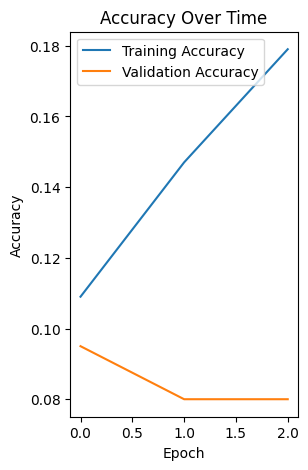

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.legend()

In [ ]:
predictions = model.predict(test_data)
accuracy = accuracy_score(test_labels, np.argmax(predictions, axis=1))
precision = precision_score(test_labels, np.argmax(predictions, axis=1), average='weighted')
recall = recall_score(test_labels, np.argmax(predictions, axis=1), average='weighted')
mae = mean_absolute_error(test_labels, np.argmax(predictions, axis=1))
mse = mean_squared_error(test_labels, np.argmax(predictions, axis=1))
rmse = np.sqrt(mse)

7/7 [==============================] - 1s 108ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Accuracy: 0.115
Precision: 0.023942428035043806
Recall: 0.115
Mean Absolute Error: 2.96
Mean Squared Error: 13.77
Root Mean Squared Error: 3.7107950630558943


In [ ]:
metrics_names = ['Accuracy', 'Precision', 'Recall', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
metrics_values = [accuracy, precision, recall, mae, mse, rmse]


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'Mean Absolute Error'),
  Text(4, 0, 'Mean Squared Error'),
  Text(5, 0, 'Root Mean Squared Error')])

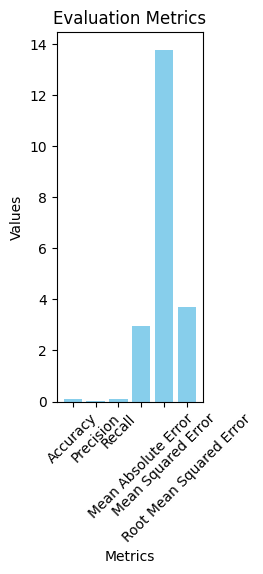

In [ ]:
plt.subplot(1, 3, 2)
plt.bar(metrics_names, metrics_values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Predictions vs. Ground Truth')

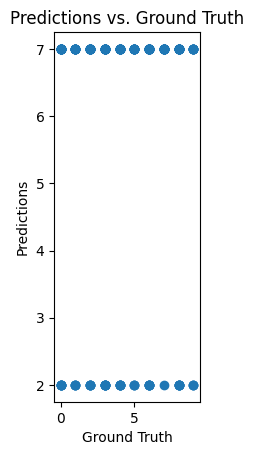

In [ ]:
plt.subplot(1, 3, 3)
plt.scatter(test_labels, np.argmax(predictions, axis=1))
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs. Ground Truth')

In [ ]:
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [ ]:
plt.show()

In [ ]:
#rnn
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
timesteps = 50
features = 10
num_classes = 2

In [ ]:
train_data = np.random.randn(1000, timesteps, features)
train_labels = np.random.randint(num_classes, size=1000)
val_data = np.random.randn(200, timesteps, features)
val_labels = np.random.randint(num_classes, size=200)
test_data = np.random.randn(200, timesteps, features)
test_labels = np.random.randint(num_classes, size=200)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(timesteps, features)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
rnn_history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_data=(val_data, val_labels))


Epoch 1/5
32/32 [==============================] - 5s 68ms/step - loss: 0.6986 - accuracy: 0.4750 - val_loss: 0.6949 - val_accuracy: 0.5050
Epoch 2/5
32/32 [==============================] - 2s 51ms/step - loss: 0.6799 - accuracy: 0.5980 - val_loss: 0.7055 - val_accuracy: 0.4700
Epoch 3/5
32/32 [==============================] - 2s 73ms/step - loss: 0.6666 - accuracy: 0.6030 - val_loss: 0.7024 - val_accuracy: 0.5100
Epoch 4/5
32/32 [==============================] - 3s 78ms/step - loss: 0.6556 - accuracy: 0.6170 - val_loss: 0.7087 - val_accuracy: 0.5300
Epoch 5/5
32/32 [==============================] - 2s 54ms/step - loss: 0.6384 - accuracy: 0.6400 - val_loss: 0.7203 - val_accuracy: 0.4550


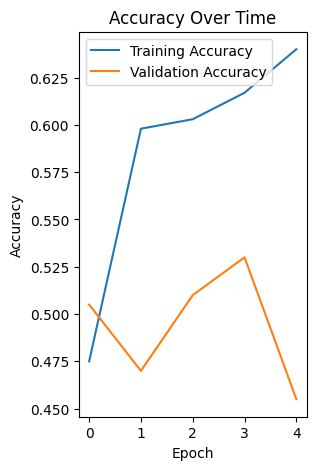

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.legend()

In [ ]:
predictions = model.predict(test_data)
accuracy = accuracy_score(test_labels, np.argmax(predictions, axis=1))
precision = precision_score(test_labels, np.argmax(predictions, axis=1), average='weighted')
recall = recall_score(test_labels, np.argmax(predictions, axis=1), average='weighted')
mae = mean_absolute_error(test_labels, np.argmax(predictions, axis=1))
mse = mean_squared_error(test_labels, np.argmax(predictions, axis=1))
rmse = np.sqrt(mse)

7/7 [==============================] - 0s 18ms/step


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Accuracy: 0.51
Precision: 0.5091071428571429
Recall: 0.51
Mean Absolute Error: 0.49
Mean Squared Error: 0.49
Root Mean Squared Error: 0.7


In [ ]:
metrics_names = ['Accuracy', 'Precision', 'Recall', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
metrics_values = [accuracy, precision, recall, mae, mse, rmse]

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'Mean Absolute Error'),
  Text(4, 0, 'Mean Squared Error'),
  Text(5, 0, 'Root Mean Squared Error')])

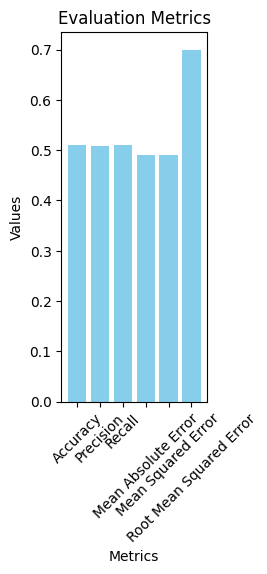

In [ ]:
plt.subplot(1, 3, 2)
plt.bar(metrics_names, metrics_values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Predictions vs. Ground Truth')

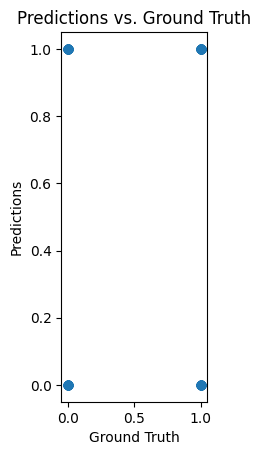

In [ ]:
plt.subplot(1, 3, 3)
plt.scatter(test_labels, np.argmax(predictions, axis=1))
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs. Ground Truth')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

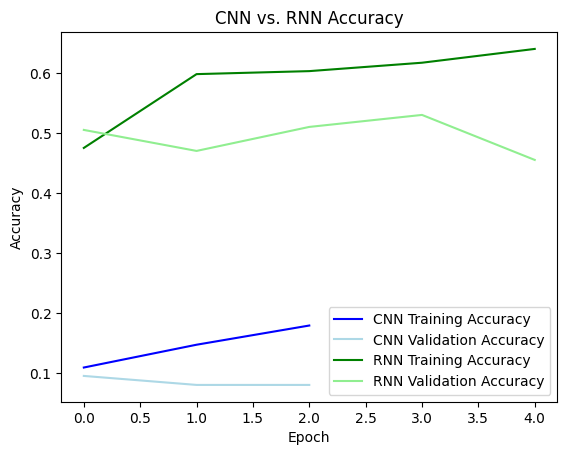

In [ ]:
#comparison of cnn and rnn
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy', color='blue')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy', color='lightblue')
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy', color='green')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy', color='lightgreen')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN vs. RNN Accuracy')
plt.legend()
plt.show()